In [56]:
from IPython.display import display, Math
import random
import matplotlib.pyplot as plt
import math

In [57]:
display(Math("k-bandits \\ simulator"))
display(Math("Initialize,\\ for \\ a \\ = \\  1 \\ to \\ k:"))
display(Math("Q(a) \\gets 0"))
display(Math("N(a) \\gets 0"))
display(Math("Loop \\ forever:"))
display(Math("A \\gets \lbrace ^{argmax_{a} \\ Q(a) \\ P \\ = \\ 1 \\ - \\ \\epsilon} _{\\ rand(a) \\ p \\ = \\ \\epsilon} "))
display(Math("R \\gets bandit(A)"))
display(Math("N(A) \\gets N(A) + 1"))
display(Math("Q(A) \\gets Q(A) + \\frac{1}{N(A)}[R - Q(A)]"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [58]:
# k-bandit simulation
k = 10

# epsilon-greedy
epsilon = [0.01, 0.1, 0]

# number of simulation runs  
episodes = 2000

# number of time steps
steps = 1000

# step size parameter
alpha = 0.01 

In [59]:
def bandit(Q, A):
    """
    Return bandit action
    """

    # q*(a) = E[Rt|At =a]
    return random.gauss(Q[A], 1.0)

In [60]:
def e_greedy(Q, epsilon):
    """
    Return an action based on e-greedy policy
    """

    # Exploitation
    action = Q.index(max(Q))
    
    # Exploration
    if random.random() < epsilon:
        
        # Explorative action
        action = Q.index(random.choice(Q))
    
    # e-greedy action
    return action

In [61]:
def test_bed(episodes, steps, epsilon, k):
    """
    10 Armed TestBed
    """
    
    # Runs/Episodes
    for _ in range(episodes):
    
        # Q(A) <-- 0
        Q = [0] * k

        # N(A) <-- 0 
        N = [0] * k
    
        # Loop forever
        for _ in range(steps):
        
            # Action A <-- e-greedy()
            A = e_greedy(Q, epsilon)
            
            # N(A) <-- N(A) + 1
            N[A] += 1
            
            # Reward <-- Bandit(A)
            R = bandit(Q, A)
            
            # Q(A) <-- Q(A) + 1/N(A)[R - Q(A)]
            Q[A] = Q[A] + 1/N[A]*(R - Q[A])
            
    return Q

In [62]:
def non_stationary(episodes, steps, epsilon, k, alpha):
    """
    Non-Stationary Bandits
    """
    
    # Runs/Episodes
    for _ in range(episodes):
    
        # Q(A) <-- 0
        Q = [0] * k

        # N(A) <-- 0 
        N = [0] * k
    
        # Loop forever
        for _ in range(steps):
        
            # Action A <-- e-greedy()
            A = e_greedy(Q, epsilon)
            
            # N(A) <-- N(A) + 1
            N[A] += 1
            
            # Reward <-- Bandit(A)
            R = bandit(Q, A)
            
            # Q(A) <-- Q(A) + 1/N(A)[R - Q(A)]
            Q[A] = Q[A] + alpha*(R - Q[A])
            
    return Q

In [63]:
def optimistic(episodes, steps, epsilon, k, alpha):
    """
    Non-Stationary Bandits
    """
    
    # Runs/Episodes
    for _ in range(episodes):
    
        # Q(A) <-- 0
        Q = [0.5] * k

        # N(A) <-- 0 
        N = [0] * k
    
        # Loop forever
        for _ in range(steps):
        
            # Action A <-- e-greedy()
            A = e_greedy(Q, epsilon)
            
            # N(A) <-- N(A) + 1
            N[A] += 1
            
            # Reward <-- Bandit(A)
            R = bandit(Q, A)
            
            # Q(A) <-- Q(A) + 1/N(A)[R - Q(A)]
            Q[A] = Q[A] + alpha*(R - Q[A])
            
    return Q

10 armed testbed


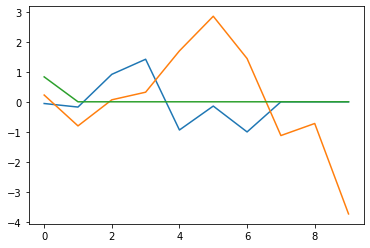

Tracking a non-stationary problem


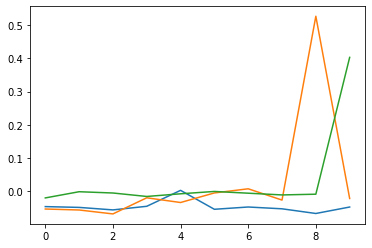

Optimistic Initial Values


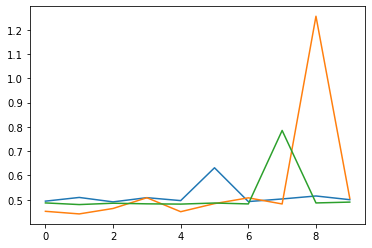

In [64]:
print("10 armed testbed")
plt.plot(test_bed(episodes, steps, epsilon[0], k))
plt.plot(test_bed(episodes, steps, epsilon[1], k))
plt.plot(test_bed(episodes, steps, epsilon[2], k))
plt.show()

print("Tracking a non-stationary problem")
plt.plot(non_stationary(episodes, steps, epsilon[0], k, alpha))
plt.plot(non_stationary(episodes, steps, epsilon[1], k, alpha))
plt.plot(non_stationary(episodes, steps, epsilon[2], k, alpha))
plt.show()

print("Optimistic Initial Values")
plt.plot(optimistic(episodes, steps, epsilon[0], k, alpha))
plt.plot(optimistic(episodes, steps, epsilon[1], k, alpha))
plt.plot(optimistic(episodes, steps, epsilon[2], k, alpha))
plt.show()